In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DataSets/Student data.csv")
df.head()

,gender,parental level of education,test preparation course,math score,reading score,writing score
0,female,bachelor's degree,none,72,72,74
1,female,some college,completed,69,90,88
2,female,master's degree,none,90,95,93
3,male,associate's degree,none,47,57,44
4,male,some college,none,76,78,75


In [ ]:
# Encode categorical variables using LabelEncoder
le = LabelEncoder()

# Encoding gender, parental level of education, and test preparation course
df['gender'] = le.fit_transform(df['gender'])
df['parental level of education'] = le.fit_transform(df['parental level of education'])
df['test preparation course'] = le.fit_transform(df['test preparation course'])



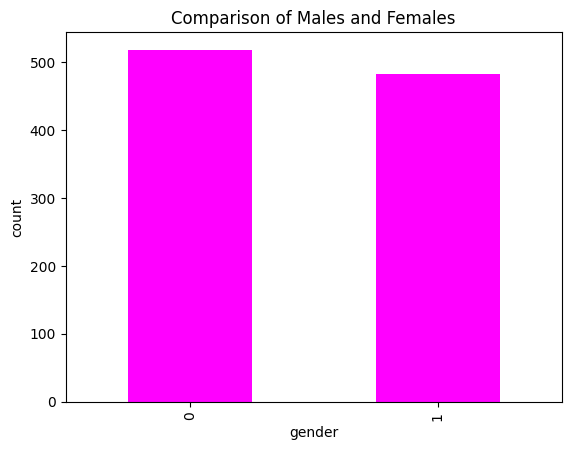

In [ ]:
# visualising the number of male and female in the dataset

df['gender'].value_counts(normalize = True)
df['gender'].value_counts(dropna = False).plot.bar(color = 'magenta')
plt.title('Comparison of Males and Females')
plt.xlabel('gender')
plt.ylabel('count')
plt.show()

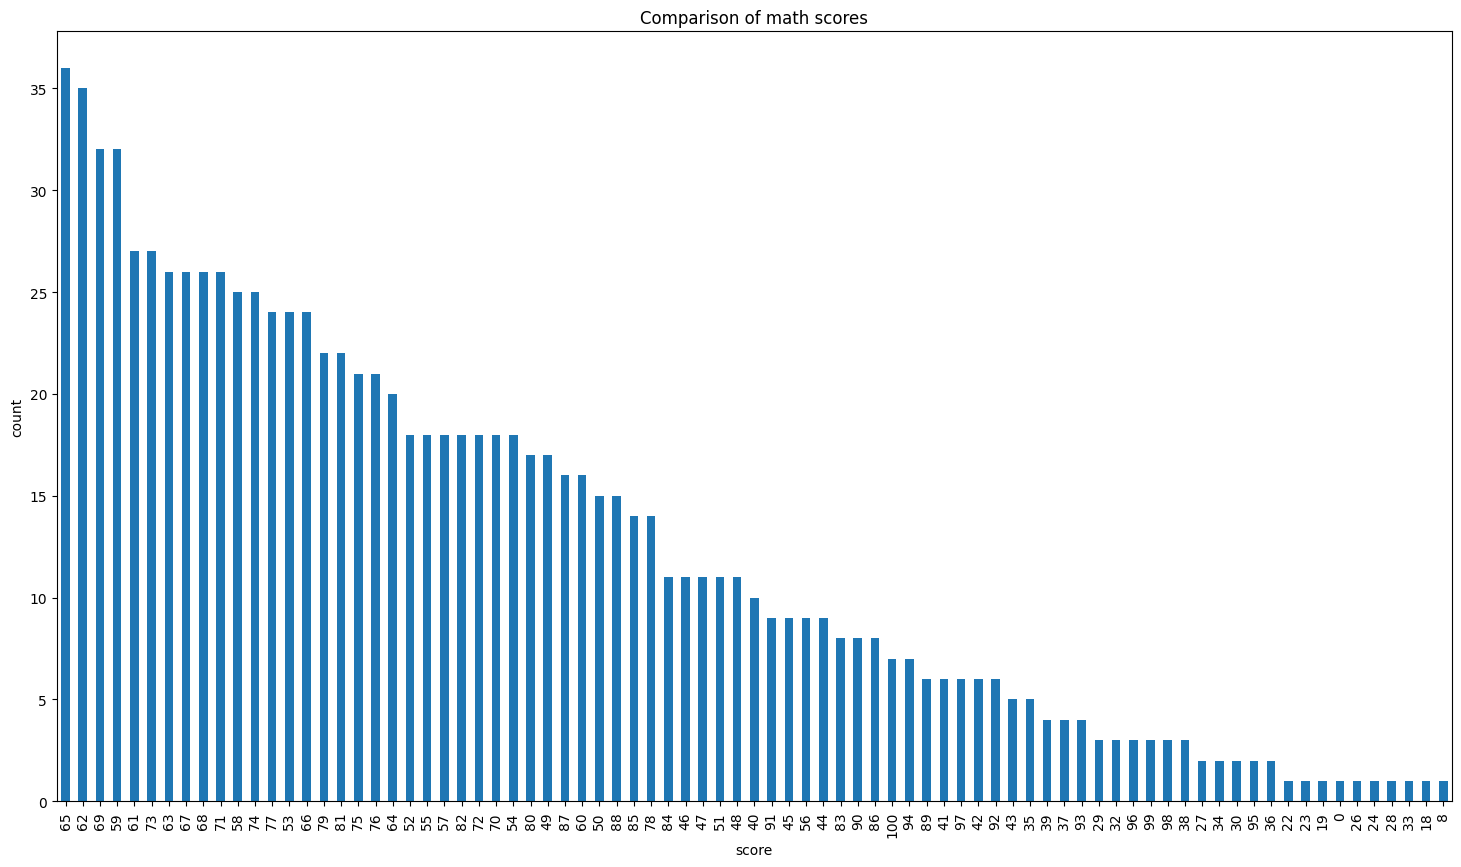

In [ ]:
# visualizing maths score

df['math score'].value_counts(normalize = True)
df['math score'].value_counts(dropna = False).plot.bar(figsize = (18, 10))
plt.title('Comparison of math scores')
plt.xlabel('score')
plt.ylabel('count')
plt.show()

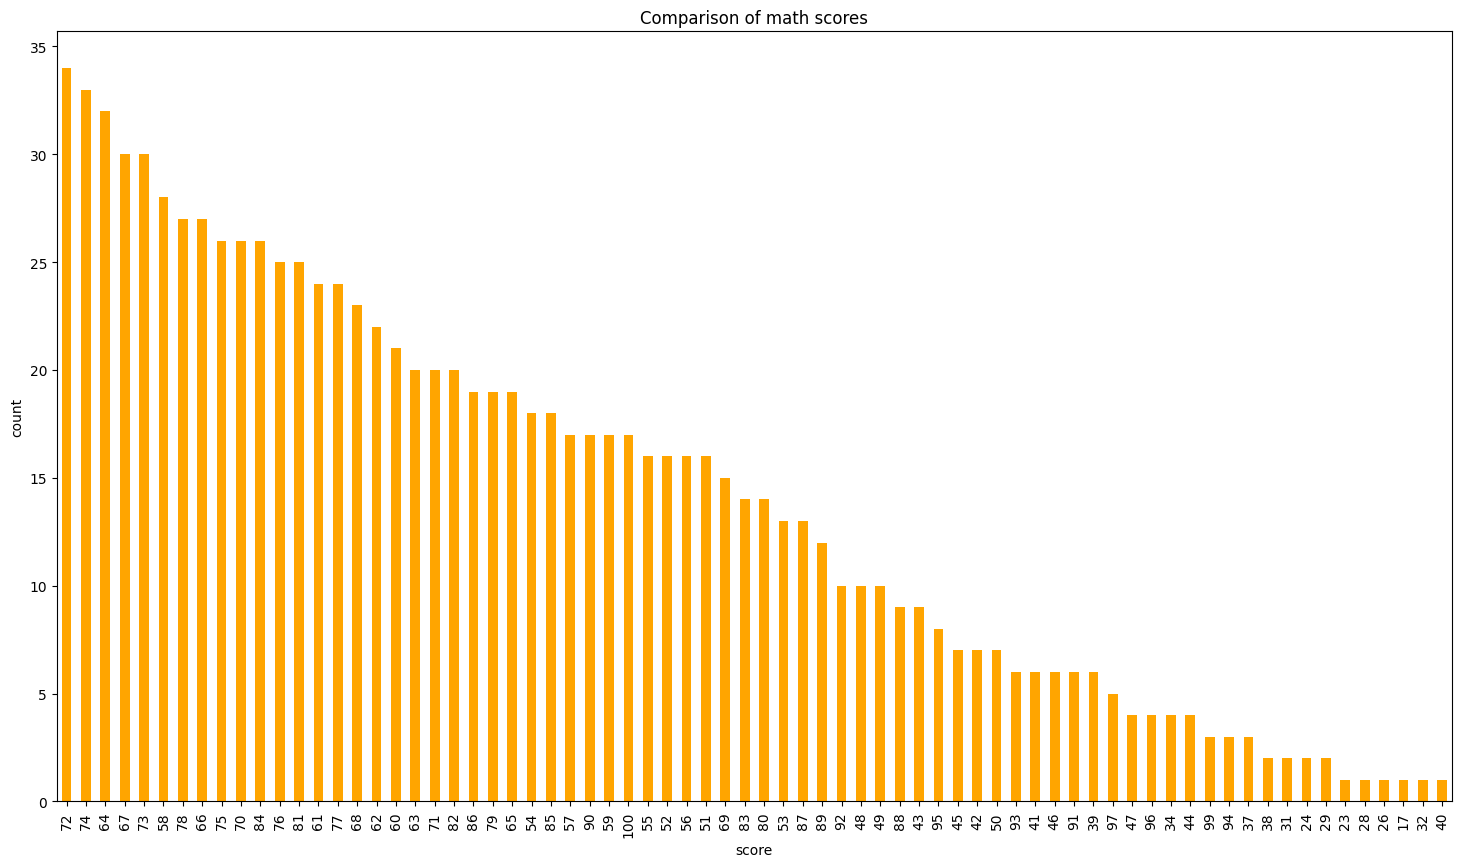

In [ ]:
# visualizing reading score score

df['reading score'].value_counts(normalize = True)
df['reading score'].value_counts(dropna = False).plot.bar(figsize = (18, 10), color = 'orange')
plt.title('Comparison of math scores')
plt.xlabel('score')
plt.ylabel('count')
plt.show()

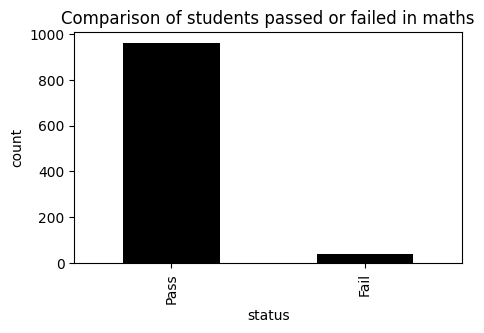

,count
pass_math,
Pass,960
Fail,40


In [ ]:
# feature engineering on the data to visualize and solve the dataset more accurately

# setting a passing mark for the students to pass on the three subjects individually
passmarks = 40

# creating a new column pass_math, this column will tell us whether the students are pass or fail
df['pass_math'] = np.where(df['math score']< passmarks, 'Fail', 'Pass')
df['pass_math'].value_counts(dropna = False).plot.bar(color = 'black', figsize = (5, 3))

plt.title('Comparison of students passed or failed in maths')
plt.xlabel('status')
plt.ylabel('count')
plt.show()
df['pass_math'].value_counts()

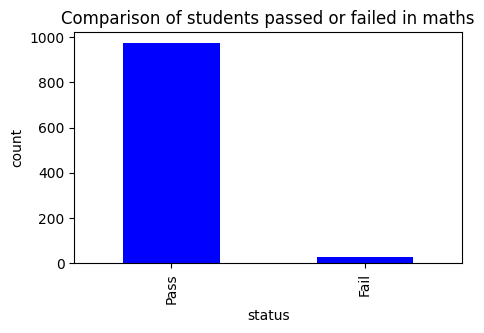

,count
pass_reading,
Pass,974
Fail,26


In [ ]:
# creating a new column pass_math, this column will tell us whether the students are pass or fail
df['pass_reading'] = np.where(df['reading score']< passmarks, 'Fail', 'Pass')
df['pass_reading'].value_counts(dropna = False).plot.bar(color = 'blue', figsize = (5, 3))

plt.title('Comparison of students passed or failed in maths')
plt.xlabel('status')
plt.ylabel('count')
plt.show()
df['pass_reading'].value_counts(dropna = False)

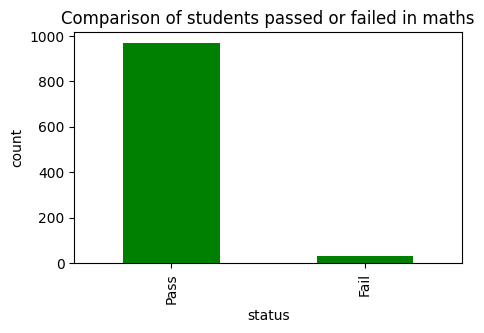

In [ ]:
# creating a new column pass_math, this column will tell us whether the students are pass or fail
df['pass_writing'] = np.where(df['writing score']< passmarks, 'Fail', 'Pass')
df['pass_writing'].value_counts(dropna = False).plot.bar(color = 'green', figsize = (5, 3))

plt.title('Comparison of students passed or failed in maths')
plt.xlabel('status')
plt.ylabel('count')
plt.show()

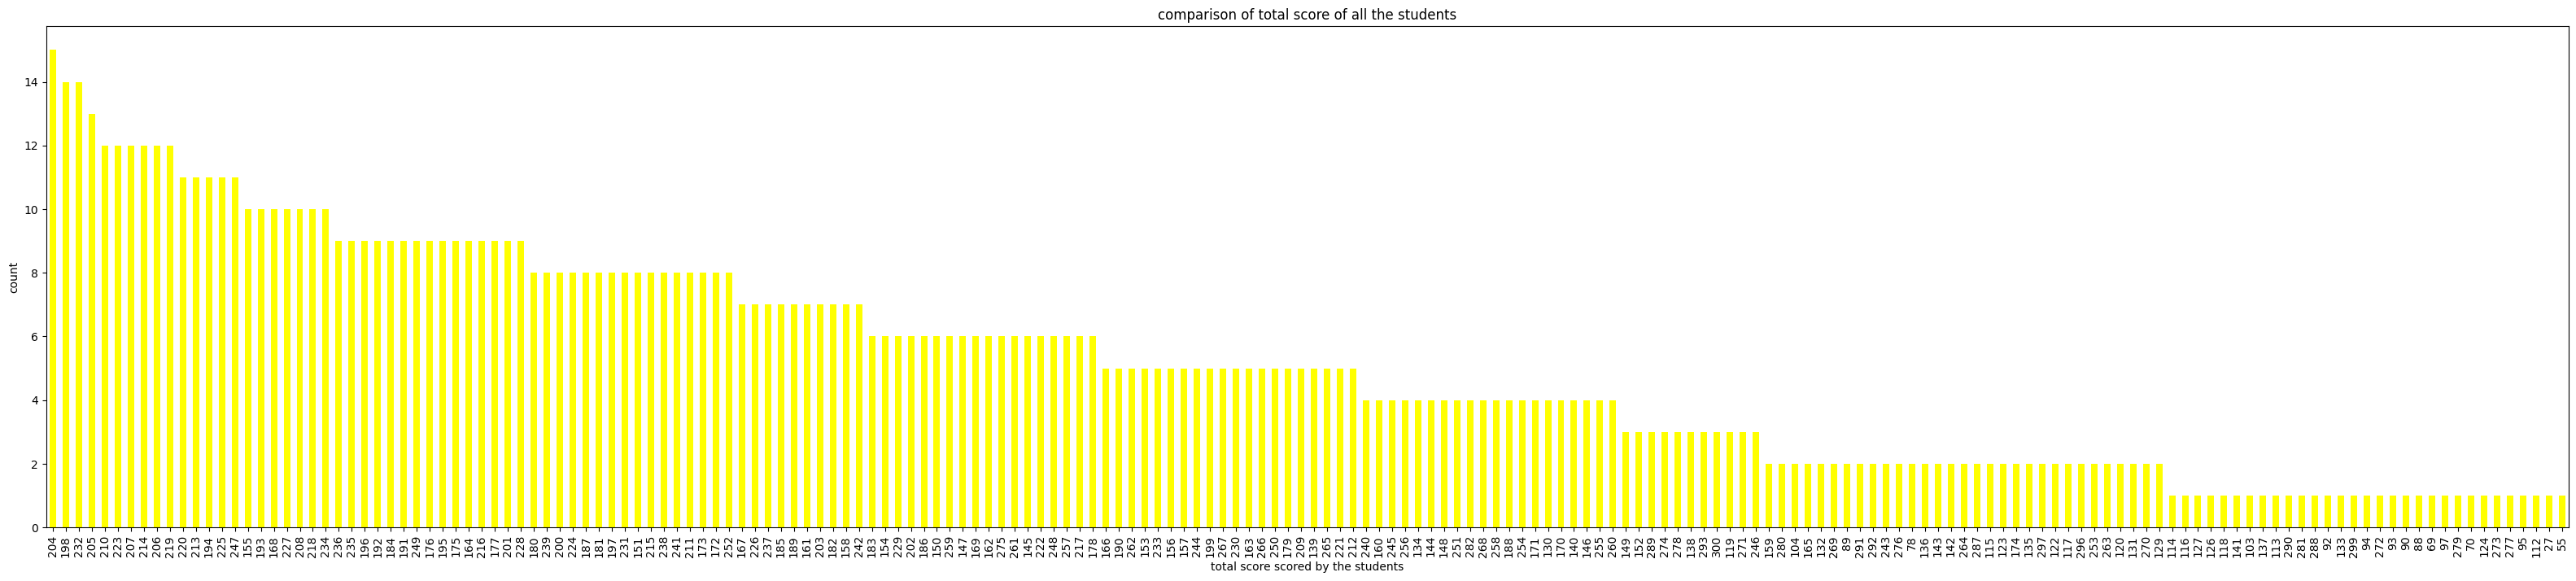

In [ ]:
# computing the total score for each student

df['total_score'] = df['math score'] + df['reading score'] + df['writing score']

df['total_score'].value_counts(normalize = True)
df['total_score'].value_counts(dropna = True).plot.bar(color = 'yellow', figsize = (40, 8))

plt.title('comparison of total score of all the students')
plt.xlabel('total score scored by the students')
plt.ylabel('count')
plt.show()

In [ ]:
# Define feature matrix X and target y (e.g., predicting math score level as a classification problem)
# Convert scores into binary classes (e.g., high or low based on a threshold)
df['math_class'] = np.where(df['math score'] > df['math score'].mean(), 1, 0)  # High (1) if above average, else Low (0)

X = df[['gender', 'parental level of education', 'test preparation course', 'reading score', 'writing score']]
y = df['math_class']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.88


In [ ]:
# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[92 12]
 [13 83]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       104
           1       0.87      0.86      0.87        96

    accuracy                           0.88       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.88      0.87       200



In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Evaluation: ")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}\n")



Model Evaluation: 
Mean Squared Error: 0.125
R-squared: 0.49919871794871795



In [ ]:
# Function to get user input and predict the grade
def predict_new_student_grade():
    try:
        # Get user input
        gender = input("Enter gender (female/male): ").strip().lower()
        parental_education = input("Enter parental level of education (e.g., some college, bachelor's degree): ").strip().lower()
        test_prep = input("Completed test preparation course (none/completed): ").strip().lower()
        reading_score = float(input("Enter reading score (0-100): "))
        writing_score = float(input("Enter writing score (0-100): "))

        # Encode the input values
        gender_encoded = le.fit_transform([gender])[0]
        parental_education_encoded = le.fit_transform([parental_education])[0]
        test_prep_encoded = le.fit_transform([test_prep])[0]

        # Prepare the input data as a numpy array
        new_student_data = np.array([[gender_encoded, parental_education_encoded, test_prep_encoded, reading_score, writing_score]])

        # Predict the grade
        predicted_grade = model.predict(new_student_data)
        grade_label = 'Pass' if predicted_grade[0] == 1 else 'Fail'
        print(f"\nPredicted grade for the student: {grade_label}")

    except ValueError as e:
        print("Invalid input. Please enter valid data.")

# Predict the grade for a new student based on user input
predict_new_student_grade()

Enter gender (female/male): female
Enter parental level of education (e.g., some college, bachelor's degree): some college
Completed test preparation course (none/completed): completed
Enter reading score (0-100): 90
Enter writing score (0-100): 85

Predicted grade for the student: Pass


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
